In [1]:
%load_ext autoreload
%autoreload 2

import torch
from dataset import CustomDataset
from torchvision.datasets import MNIST
from torchvision import transforms as tfs
from utils import *

/home/ubuntu/anaconda3/envs/retrieval/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
tr_ds = CustomDataset("dataset/sign_mnist_train/sign_mnist_train.csv")
val_ds = CustomDataset("dataset/sign_mnist_test/sign_mnist_test.csv")
print(len(tr_ds)); print(len(val_ds))

27455
7172


In [3]:
# ts = tfs.Compose([tfs.ToTensor()])
# tr_ds = MNIST(root = "dataset", download = True, train = True, transform = ts)
# val_ds = MNIST(root = "dataset", download = True, train = False, transform = ts)

In [4]:
bs = 64
tr_dl = torch.utils.data.DataLoader(tr_ds, batch_size = bs, shuffle = True)
val_dl = torch.utils.data.DataLoader(val_ds, batch_size = bs, shuffle = False)
print(len(tr_dl)); print(len(val_dl))

429
113


In [5]:
tr_ds[0][0].shape

torch.Size([1, 28, 28])

In [6]:
class CustomModel1(torch.nn.Module):
    
    def __init__(self, in_feats, out_feats, n_cls):
        super().__init__()
        
        self.layer_1 = torch.nn.Linear(in_features = in_feats, out_features = out_feats)
        self.act = torch.nn.ReLU()
        self.layer_2 = torch.nn.Linear(in_features = out_feats, out_features = out_feats // 2)
        self.layer_3 = torch.nn.Linear(in_features = out_feats // 2, out_features = n_cls)
        self.flatten = torch.nn.Flatten(start_dim = 1, end_dim = -1)
        
    def forward(self, inp):
        
        inp = self.flatten(inp)
        inp = self.act(self.layer_1(inp))
        inp = self.act(self.layer_2(inp))
        
        return self.layer_3(inp)
    
# inp = torch.rand(1,1,28,28)
# m = CustomModel1(in_feats = 28 * 28, out_feats = 280, n_cls = 25)
# m(inp).shape

In [7]:
class CustomModel2(torch.nn.Module):
    
    def __init__(self, in_chs, out_chs, in_fs, out_fs, n_cls):
        super().__init__()
        
        self.layer_1 = torch.nn.Conv2d(in_channels = in_chs, out_channels = out_chs, kernel_size = 3, stride = 1, padding = 1)
        self.layer_2 = torch.nn.Conv2d(in_channels = out_chs, out_channels = out_chs * 2, kernel_size = 3, stride = 1, padding = 1)
        self.layer_3 = torch.nn.Linear(in_features = in_fs, out_features = out_fs)
        self.layer_4 = torch.nn.Linear(in_features = out_fs, out_features = n_cls)
        self.act = torch.nn.ReLU()
        self.mp = torch.nn.MaxPool2d(kernel_size = 2, stride = 2)
        
        self.flatten = torch.nn.Flatten(start_dim = 1, end_dim = -1)
        
    def forward(self, inp):
        
        inp = self.mp(self.act(self.layer_1(inp)))
        inp = self.mp(self.act(self.layer_2(inp)))
        inp = self.act(self.layer_3(self.flatten(inp)))
        
        return self.layer_4(inp)

# inp = torch.rand(1,1,28,28)
# m = CustomModel2(in_chs = 1, out_chs = 16, in_fs = 32 * 7 * 7, out_fs = 16 * 7 * 7, n_cls = 25)
# m(inp).shape

In [8]:
from tqdm import tqdm
import os

models_di = {"model_1": CustomModel1(in_feats = 28 * 28, out_feats = 280, n_cls = 25),
             "model_2": CustomModel1(in_feats = 28 * 28, out_feats = 100, n_cls = 25),
             "model_3": CustomModel1(in_feats = 28 * 28, out_feats = 64, n_cls = 25),
             "model_4": CustomModel2(in_chs = 1, out_chs = 8, in_fs = 16 * 7 * 7, out_fs = 8 * 7 * 7, n_cls = 25),
             "model_5": CustomModel2(in_chs = 1, out_chs = 16, in_fs = 32 * 7 * 7, out_fs = 16 * 7 * 7, n_cls = 25)}

In [9]:
epochs, device, loss_fn = train_setup()

In [10]:
trained_models_di = train(models_di = models_di, device = device, epochs = epochs, tr_dl = tr_dl, val_dl = val_dl, loss_fn = loss_fn, print_freq = 5)

model_1 bilan train boshlandi...


429it [00:09, 46.46it/s] 
429it [00:01, 336.74it/s]
429it [00:01, 340.19it/s]
429it [00:01, 334.52it/s]
429it [00:01, 337.70it/s]


Epoch 5 train jarayoni tugadi
Epoch 5 dagi train loss -> 0.669
Epoch 5 dagi train accuracy -> 0.770
Epoch 5 validation jarayoni tugadi
Epoch 5 dagi validation loss -> 1.417
Epoch 5 dagi validation accuracy -> 0.605


429it [00:01, 335.25it/s]
429it [00:01, 329.96it/s]
429it [00:01, 327.68it/s]
429it [00:01, 329.71it/s]
429it [00:01, 334.71it/s]


Epoch 10 train jarayoni tugadi
Epoch 10 dagi train loss -> 0.226
Epoch 10 dagi train accuracy -> 0.922
Epoch 10 validation jarayoni tugadi
Epoch 10 dagi validation loss -> 1.738
Epoch 10 dagi validation accuracy -> 0.663
model_1 bilan train yakunlandi!
model_2 bilan train boshlandi...


429it [00:01, 334.81it/s]
429it [00:01, 334.94it/s]
429it [00:01, 334.57it/s]
429it [00:01, 348.88it/s]
429it [00:01, 343.68it/s]


Epoch 5 train jarayoni tugadi
Epoch 5 dagi train loss -> 3.185
Epoch 5 dagi train accuracy -> 0.047
Epoch 5 validation jarayoni tugadi
Epoch 5 dagi validation loss -> 3.208
Epoch 5 dagi validation accuracy -> 0.020


429it [00:01, 340.77it/s]
429it [00:01, 340.89it/s]
429it [00:01, 340.43it/s]
429it [00:01, 341.76it/s]
429it [00:01, 342.28it/s]


Epoch 10 train jarayoni tugadi
Epoch 10 dagi train loss -> 3.179
Epoch 10 dagi train accuracy -> 0.046
Epoch 10 validation jarayoni tugadi
Epoch 10 dagi validation loss -> 3.204
Epoch 10 dagi validation accuracy -> 0.020
model_2 bilan train yakunlandi!
model_3 bilan train boshlandi...


429it [00:01, 340.25it/s]
429it [00:01, 339.21it/s]
429it [00:01, 340.02it/s]
429it [00:01, 339.36it/s]
429it [00:01, 340.85it/s]


Epoch 5 train jarayoni tugadi
Epoch 5 dagi train loss -> 1.952
Epoch 5 dagi train accuracy -> 0.320
Epoch 5 validation jarayoni tugadi
Epoch 5 dagi validation loss -> 1.957
Epoch 5 dagi validation accuracy -> 0.343


429it [00:01, 341.26it/s]
429it [00:01, 345.14it/s]
429it [00:01, 339.05it/s]
429it [00:01, 341.44it/s]
429it [00:01, 338.73it/s]


Epoch 10 train jarayoni tugadi
Epoch 10 dagi train loss -> 1.073
Epoch 10 dagi train accuracy -> 0.623
Epoch 10 validation jarayoni tugadi
Epoch 10 dagi validation loss -> 1.894
Epoch 10 dagi validation accuracy -> 0.445
model_3 bilan train yakunlandi!
model_4 bilan train boshlandi...


429it [00:09, 43.57it/s] 
429it [00:01, 241.19it/s]
429it [00:01, 256.49it/s]
429it [00:01, 241.39it/s]
429it [00:01, 239.96it/s]


Epoch 5 train jarayoni tugadi
Epoch 5 dagi train loss -> 0.000
Epoch 5 dagi train accuracy -> 1.000
Epoch 5 validation jarayoni tugadi
Epoch 5 dagi validation loss -> 0.688
Epoch 5 dagi validation accuracy -> 0.869


429it [00:01, 238.75it/s]
429it [00:01, 239.04it/s]
429it [00:01, 238.91it/s]
429it [00:01, 250.72it/s]
429it [00:01, 240.74it/s]


Epoch 10 train jarayoni tugadi
Epoch 10 dagi train loss -> 0.000
Epoch 10 dagi train accuracy -> 1.000
Epoch 10 validation jarayoni tugadi
Epoch 10 dagi validation loss -> 0.679
Epoch 10 dagi validation accuracy -> 0.877
model_4 bilan train yakunlandi!
model_5 bilan train boshlandi...


429it [00:02, 194.36it/s]
429it [00:01, 236.90it/s]
429it [00:01, 237.07it/s]
429it [00:01, 238.64it/s]
429it [00:01, 242.42it/s]


Epoch 5 train jarayoni tugadi
Epoch 5 dagi train loss -> 0.000
Epoch 5 dagi train accuracy -> 1.000
Epoch 5 validation jarayoni tugadi
Epoch 5 dagi validation loss -> 0.851
Epoch 5 dagi validation accuracy -> 0.854


429it [00:01, 238.64it/s]
429it [00:01, 240.48it/s]
429it [00:01, 230.46it/s]
429it [00:01, 252.13it/s]
429it [00:01, 238.59it/s]


Epoch 10 train jarayoni tugadi
Epoch 10 dagi train loss -> 0.000
Epoch 10 dagi train accuracy -> 1.000
Epoch 10 validation jarayoni tugadi
Epoch 10 dagi validation loss -> 0.917
Epoch 10 dagi validation accuracy -> 0.856
model_5 bilan train yakunlandi!



Accuracy -> 0.7276910206358059


Accuracy -> 0.037228109313998885


Accuracy -> 0.4516174010039041


Accuracy -> 0.8766034578918015


Accuracy -> 0.8583379810373676



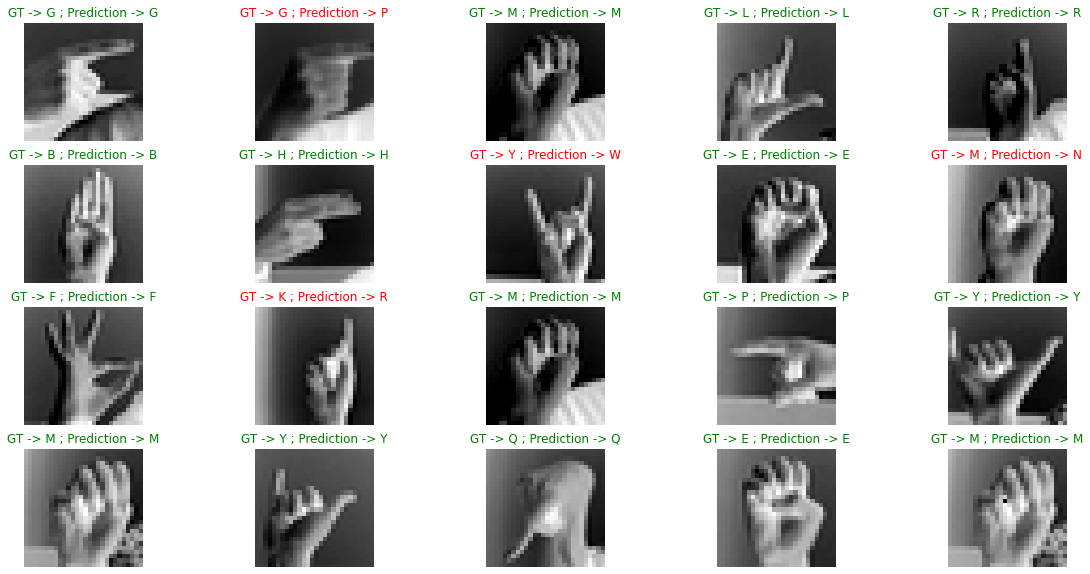

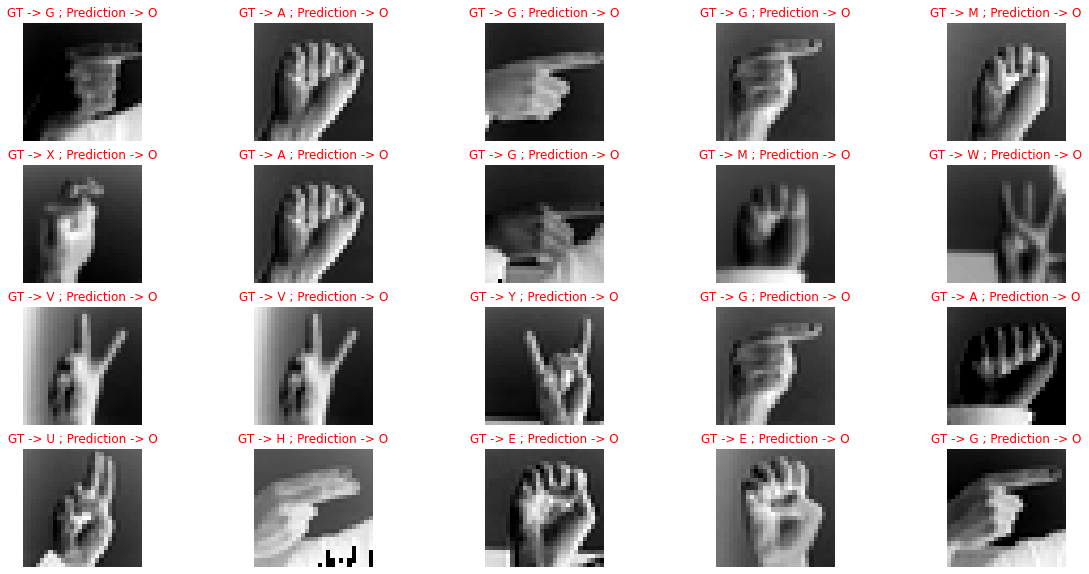

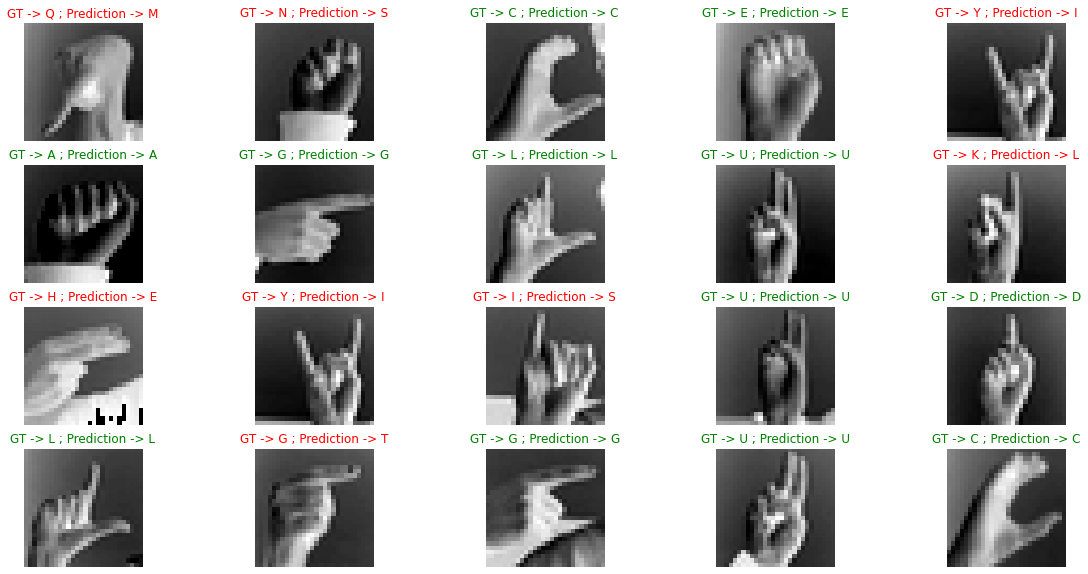

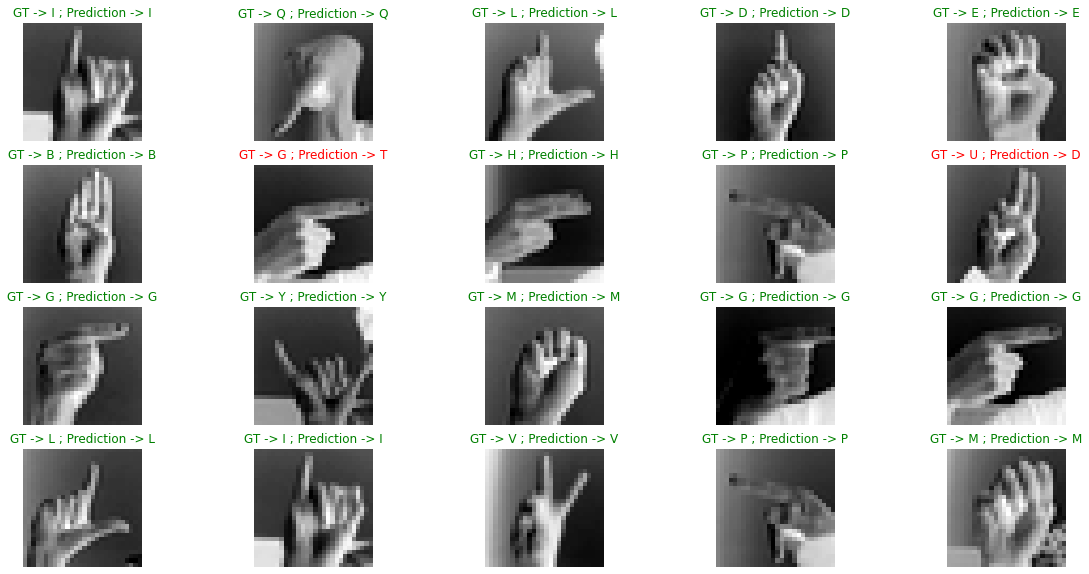

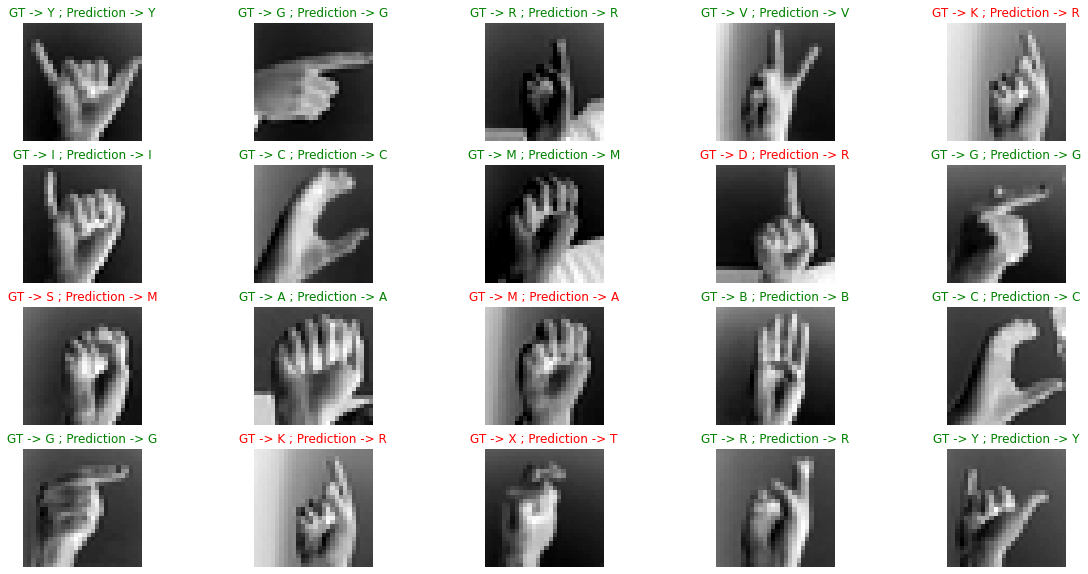

In [11]:
import string
cls_names = list(string.ascii_uppercase)

for model_name, model in trained_models_di.items():
    model.to(device)
    inference(model = model, device = "cuda:3", test_dl = val_dl, num_ims = 20, row = 4, cls_names = cls_names)


Accuracy -> 0.9043502509760178



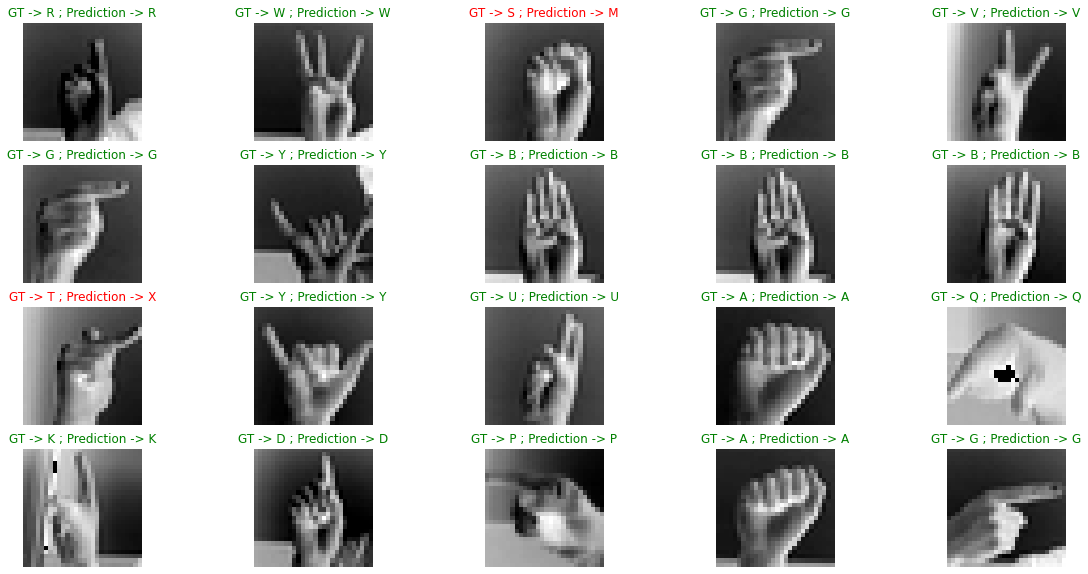

In [12]:
from utils import ensemble_inference
ensemble_inference(models = trained_models_di, num_models = len(trained_models_di), device = device, test_dl = val_dl, num_ims = 20, row = 4, cls_names = cls_names)